# Linear Regression

## Objectives

* Discuss the concepts of covariance and correlation.
* Perform linear regression by hand using a dataset.
* Understand the underlying principles of linear regression and how it works.
* Describe the assumptions of linear regression.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

In [72]:
#example code
import statsmodels.api as sm
import pandas as pd

# Example data
data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 7, 11]
})

# Define the dependent and independent variables
X = data['X']
Y = data['Y']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     51.86
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00552
Time:                        22:14:53   Log-Likelihood:                -5.6451
No. Observations:                   5   AIC:                             15.29
Df Residuals:                       3   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000      1.013     -0.987      0.3

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Covariance and Correlation

Generally, cities with higher population tend to have more buses required to ferry passengers from one point to the other in the city. The more the population, the more the number of buses required to ferry this people in and around the city. What do you think will happen in a city with less population?

### Covariance

The concept of covariance describes to what extent one variable is related to another variable.

Measures the joint variablity of two variables. 

Defines the changes between two variables such that change in one variable is equal to change in another variable. 

* Postive covariance - Both variable move in the same direction.
* Negative Covariance - Both the variables moves in the opposite direction. 

**Sample Covariance Formula**

>>>>>$cov(X, Y) = \frac{\sum\limits_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n-1}$


In [73]:
# example data 
m = np.array([1,2,3,4,5])
n = np.array([3,5,7,9,11])

In [74]:
# covariance
covariance = np.cov(m,n, ddof=0)[0, 1]

print(f"Covariance between x and y: {covariance}")

Covariance between x and y: 4.0


In [75]:
# returns a 2D array
cov = np.cov(m,n,ddof=0)
print(cov)
#variance of m along the diagonal is 2
#variance of n along the diagonal is 8
#covariance between m and n (off diagonal) is 4

[[2. 4.]
 [4. 8.]]


In [76]:
# compute the variance
np.var(n)

8.0

In [77]:
# compute the variance of m
np.var(m)

2.0

The value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is required is a way to measure covariance using a *standardized scale*, which is why we use correlation

### Correlation

The idea of correlation estimates the depth of the relationship between variables.

It is a measure used to describe how strongly the given two random variables are related to each other.

The correlation coefficient lies between ```-1 <= x => +1```(This was the point of standardizing covariance).

>>>>$corr(X, Y) = cov(X, Y) / (sX * sY)$

**Pearson Correlation**


>>>>$\Large r_P = \frac{\Sigma^n_{i=1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i=1}(x_i - \mu_x)^2\Sigma^n_{i=1}(y_i - \mu_y)^2}}$



In [78]:
# calculating correlation using numpy 
correlation = np.corrcoef(m,n)[0,1]
print(f"Correlation between m and n: {correlation}")

Correlation between m and n: 0.9999999999999999


In [79]:
# returns a matrix
np.corrcoef(m,n)

array([[1., 1.],
       [1., 1.]])

In [80]:
# compare with the formular above
np.round(np.corrcoef(m, n)[0, 1], 5) == np.round((np.cov(m, n, ddof=0) / (np.std(m) * np.std(n)))[0, 1],5)

True

In [81]:
np.round(np.corrcoef(m, n)[0, 1], 5)

1.0

In [82]:
np.round((np.cov(m, n, ddof=0) / (np.std(m) * np.std(n)))[0, 1],5)

1.0

Compute with scipy

In [83]:
stats.pearsonr(m,n)[0]

1.0

In [84]:
#pearsonr calculates both the correlation coefficient and p_value 
corrcoef, p_value = stats.pearsonr(m, n)
print(corrcoef)
print(p_value)

1.0
0.0


### Correlation is not Causation

Just because two variables are associated or appear to be related, it does not necessarily mean that one variable is causing the other.

Correlation doesn't imply causality, as there could be other factors that are causing the observation.

Consider the correlation between ice cream sales and crime rates. These two variables might be positively correlated, meaning that as ice cream sales increase, so do crime rates. However, it would be incorrect to conclude that ice cream sales cause crime. A more plausible explanation is that both variables are correlated with a third variable, such as temperature. As temperature increases, people tend to buy more ice cream, and there is also an increase in crime rates due to more people being outside and more opportunities for crime.

When interpreting the results of a correlation analysis, it is important to exercise caution and avoid making casual inferences based solely on the correlation coefficient. 

## Getting Started With Linear Regression

Suppose we want to predict the price of a house based on its size in square feet. We collect the following data:

| Size (in square feet) | Price (in thousands of dollars) |
|-----------------------|-----------------------|
| 1000 | 150 |
| 1500 | 200 |
| 2000 | 250 |
| 2500 | 300 |
| 3000 | 350 |
| 3500 | 400 |
| 4000 | 450 |

* Dependent variable - Main factor we are trying to predict, ie the price of the house.
* Independent varibale - The variable that have a relationship with the dependent variable, ie size. 

In [85]:
data = {'Size': [1000, 1500, 2000, 2500, 3000, 3500, 4000],
        'Price': [150, 200, 250, 300, 350, 400, 450]}

df = pd.DataFrame(data)

df.head()

,Size,Price
0,1000,150
1,1500,200
2,2000,250
3,2500,300
4,3000,350


## Linear Regression By Hand

### Hypothesis For regression 

* The null hypothesis $H_0$ is that the slope = 0.
* General Equation od the line of best fit ```y = a + bx```.

>>>>$b = \frac{N(\sum XY) - (\sum X)(\sum Y)}{N(\sum X^2) - (\sum X)^2}$

In [86]:
# create column XY by multiplying values of X and Y

df["XY"] = df.apply(lambda row: row["Size"] * row["Price"], axis=1)

# create column X^2 

df["X^2"] = df.apply(lambda row: row["Size"] ** 2, axis = 1)

df.head()

,Size,Price,XY,X^2
0,1000,150,150000,1000000
1,1500,200,300000,2250000
2,2000,250,500000,4000000
3,2500,300,750000,6250000
4,3000,350,1050000,9000000


In [87]:
print(df["Size"])
print(df["Price"])


0    1000
1    1500
2    2000
3    2500
4    3000
5    3500
6    4000
Name: Size, dtype: int64
0    150
1    200
2    250
3    300
4    350
5    400
6    450
Name: Price, dtype: int64


In [88]:
#calculating the slope by using the formula corrcoef multiplied by std_dev of PRICE / std_dev of SIZE
# calculating the corrcoef of X and Y
data = pd.DataFrame(
         {'Size': [1000, 1500, 2000, 2500, 3000, 3500, 4000],
          'Price': [150, 200, 250, 300, 350, 400, 450]})

#Extracting the size and price columns as arrays
Size = data['Size'].values
Price = data['Price'].values


rho = np.corrcoef(Size ,Price)[0,1]
print(rho)

#Calculate the standard deviation of price and size
std_dev_Size = np.std(Size,ddof = 0)
std_dev_Price = np.std(Price,ddof = 0)

#Calculate the slope
slope = np.round((rho * std_dev_Price / std_dev_Size),2)
slope

0.9999999999999999


0.1

In [89]:
# calculate slope 

def calculate_slope(X, y, data):
    """Simple function that calculates the slope"""
    # length of the dataframe
    n = len(data)

    # create column XY by multiplying values of X and Y
    data["XY"] = data.apply(lambda row: row[X] * row[y], axis=1)

    # summation of XY 
    sum_xy = data["XY"].sum()

    # summation of X
    sum_x = data[X].sum()

    # summation of Y
    sum_y = data[y].sum()

    # create column X^2 

    data["X^2"] = data.apply(lambda row: row[X] ** 2, axis = 1)

    # summation of X^2 (summation of x*x)
    sum_x_sqrd = data["X^2"].sum()

    # square of total x
    sqr_total_x = np.square(sum_x)

    b = ((n * sum_xy) - (sum_x)*(sum_y)) / ((n * sum_x_sqrd) - (sqr_total_x))

    return b

b = calculate_slope("Size", "Price", df)
b 
    

0.1

* calculate the value a by plugging in the avaegaes of X and Y 

>>>>$a = M_y - (b)(M_x)$

In [90]:
#Calculating for the intercept
#a = Y_mean - (slope * X_mean)
data = pd.DataFrame(
         {'Size': [1000, 1500, 2000, 2500, 3000, 3500, 4000],
          'Price': [150, 200, 250, 300, 350, 400, 450]})

#Extracting the size and price columns as arrays
Size = data['Size'].values
Price = data['Price'].values

#Calculating the mean of Y
Y_mean = np.mean(Price)

#Calculating the mean of X
X_mean = np.mean(Size)

slope = 0.1

#Calculating for the intercept
a = Y_mean - (slope * X_mean)
a



50.0

In [91]:
def calculate_intercept(X, y, data):
    """Simple function to calculate the value of the intercept"""

    # calulcate the mean of X
    x_mean = np.mean(data[X])

    # calulcate the mean of y
    y_mean = np.mean(data[y])

    # get the value of B
    b = calculate_slope(X, y, data)

    a = y_mean - (b * x_mean)

    return a 

a = calculate_intercept("Size", "Price", df)
a 


50.0

In [92]:
#Calculating y predicted
slope = 0.1
x_new = 3500
a = 50.0 #intercept

Y_predicted = slope * (x_new + a)
Y_predicted

355.0

In [93]:
# make predictions (y = a + bx)

def get_user_input():
    """Simple function to get user input"""
    X = int(input("Enter the size of the house: "))

    return X

def make_predictions(X, y, data):
    """Simple function to make predictions based on our data""" 

    # get the value of the slope, b
    b = calculate_slope(X, y, data)

    # get the value of the intercept, a 
    a = calculate_intercept(X, y, data)

    # make prediction 
    x = get_user_input()
    y = a + (b * x)

    return y 

make_predictions("Size", "Price", df)


400.0

In [94]:
# use the function to make predictions
# where X = 2500, we expect 3000
make_predictions("Size", "Price", df)

300.0

In [95]:
# making predictions on unseen data
# where X = 4000 
make_predictions("Size", "Price", df)

450.0

## Implementation in Python Using Principle of Least squares

* Tasked with finding the y-intercept and the slope where the residual error is minimum. 

In [96]:
def find_slope_intercept(X, y):
    """Simple function to get the intercept and slope"""
    # number of observations
    n = np.size(X)

    # mean of X and y
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    # calculate the cross-deviation
    SS_xy = np.sum(y*X) - (n * y_mean * x_mean)
    # calculating the deviation about X
    SS_xx = np.sum(X*X) - (n * x_mean * x_mean)

    # calculate the regression coefficients 
    slope = SS_xy / SS_xx
    intercept = y_mean - (slope * x_mean)

    return (slope, intercept)

find_slope_intercept(df["Size"], df["Price"])

(0.1, 50.0)

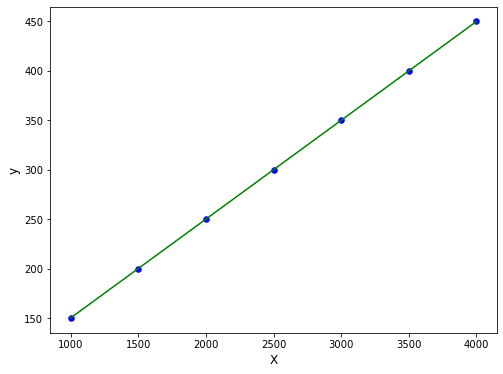

In [99]:
def plot_regression_line(X, y, b):
    """Simple function that draws the regression line"""
    # plot using a scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(X, y, color = "b", s = 30)

    # predict dependent variable 
    y_pred = b[1] + b[0] * X

    # plot regression line
    plt.plot(X, y_pred, color = 'g')

    # lable 
    plt.xlabel("X", fontsize = 12)
    plt.ylabel("y", fontsize = 12)

    plt.show()

b = find_slope_intercept(df["Size"], df["Price"])

plot_regression_line(df["Size"], df["Price"], b)

## Assumptions of Before Linear Regression

Let's explore the key assumptions of linear regression. These assumptions provide a solid foundation for the application of linear regression in statistical analysis. By understanding these assumptions, we can assess the **validity** and **reliability** of our results and make informed decisions based on the outcomes of our analysis.

* The **indepedent varible** is on the $x$-axis.

📝 While it is *common practice* to plot the independent variable on the X-axis in a linear regression, this is not an assumption of the model.

* Identify and remove outliers

<details>
<summary>What's outliers got to do with linear regression?</summary>

🥴 Outliers are data points that are significantly different from the other data points in the dataset. 

Outliers can 
* Bias the estimation of the regression coefficients and reduce the accuracy of the model. 
* Affect the normality assumption of the error term, which is one of the assumptions of linear regression. 
* Presence of outliers in the error term can lead to non-normality and *heteroscedasticity*, which can result in biased estimates and reduced accuracy of the model.
* Have a significant impact on the prediction performance of the model. 
    1. In the predictor variables can lead to overfitting, where the model fits the training data too closely and performs poorly on new data. 
    2. In the response variable can lead to significant deviations from the predicted values, reducing the accuracy of the model.

**Recap Ouliers**

Let's imagine that we are quality control manager for a company that produces light bulbs. You collect data on the watts consumption by each bulb and you want to make sure that they are all as per the industry standard and regulations. 

![light_bulb](images/light_bulb.jpg) [photo](https://www.suck.uk.com/products/magic-filament-light-bulb/?start_gallery=1)

*Find the Bulbs not required as per the Industry standard and regultions*.

In [100]:
# set the seed for the random number generator
np.random.seed(42)
# Generate random data column with mean of 50, standard deviation of 10 and 50 values
data = np.random.normal(loc=50, scale=10, size=50)
# add 5 outliers with values between 100 and 150 
outliers_1 = np.random.uniform(low=100, high=150, size=5)
# add 5 outliers with values between 0 and 5
outliers_2 = np.random.uniform(low=0, high=5, size=5)

# add the outliers to our data 
data = np.append(data, [outliers_1, outliers_2])

watts = pd.Series(data)

In [101]:
data

array([5.49671415e+01, 4.86173570e+01, 5.64768854e+01, 6.52302986e+01,
       4.76584663e+01, 4.76586304e+01, 6.57921282e+01, 5.76743473e+01,
       4.53052561e+01, 5.54256004e+01, 4.53658231e+01, 4.53427025e+01,
       5.24196227e+01, 3.08671976e+01, 3.27508217e+01, 4.43771247e+01,
       3.98716888e+01, 5.31424733e+01, 4.09197592e+01, 3.58769630e+01,
       6.46564877e+01, 4.77422370e+01, 5.06752820e+01, 3.57525181e+01,
       4.45561728e+01, 5.11092259e+01, 3.84900642e+01, 5.37569802e+01,
       4.39936131e+01, 4.70830625e+01, 4.39829339e+01, 6.85227818e+01,
       4.98650278e+01, 3.94228907e+01, 5.82254491e+01, 3.77915635e+01,
       5.20886360e+01, 3.04032988e+01, 3.67181395e+01, 5.19686124e+01,
       5.73846658e+01, 5.17136828e+01, 4.88435172e+01, 4.69889630e+01,
       3.52147801e+01, 4.28015579e+01, 4.53936123e+01, 6.05712223e+01,
       5.34361829e+01, 3.23695984e+01, 1.07046211e+02, 1.40109849e+02,
       1.03727532e+02, 1.49344347e+02, 1.38612238e+02, 9.93578408e-01,
      

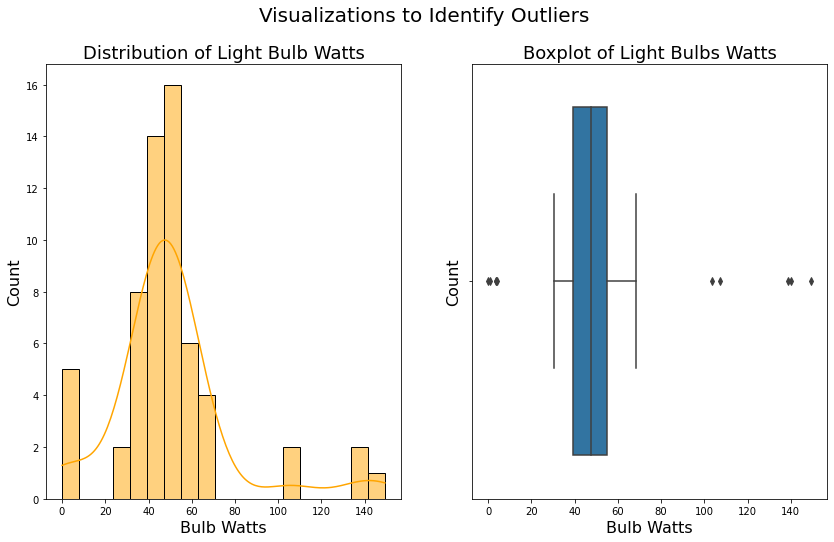

In [102]:
# Visual inspection 

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# using a histogram
sns.histplot(watts, color = "orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Count", fontsize=16)
ax[0].set_xlabel("Bulb Watts", fontsize=16)
ax[0].set_title("Distribution of Light Bulb Watts", fontsize=18)

# using a boxplot
sns.boxplot(x=watts, ax=ax[1])
ax[1].set_ylabel("Count", fontsize=16)
ax[1].set_xlabel("Bulb Watts", fontsize=16)
ax[1].set_title("Boxplot of Light Bulbs Watts", fontsize=18)

fig.suptitle("Visualizations to Identify Outliers", fontsize=20)

plt.show()

* From the Histogram:
    * There are bars to the left and right away from the cluster of bars.
* From the Boxplot:
    * Outliers are represented by points that are located outside the "whiskers" of the plot. 

Both show that out data has outliers, lets find those bulbs!!



**Step it up: Boxplots**


In [103]:
# what is happening in this boxplots?
from matplotlib.cbook import boxplot_stats

stat = boxplot_stats(watts)
stat

[{'mean': 50.63968406387039,
  'iqr': 15.892072167274165,
  'cilo': 44.43744576098044,
  'cihi': 50.8796509222944,
  'whishi': 68.52278184508938,
  'whislo': 30.403298761202244,
  'fliers': array([9.93578408e-01, 2.76105856e-02, 4.07730714e+00, 3.53428672e+00,
         3.64503584e+00, 1.07046211e+02, 1.40109849e+02, 1.03727532e+02,
         1.49344347e+02, 1.38612238e+02]),
  'q1': 39.18968408927499,
  'med': 47.65854834163742,
  'q3': 55.081756256549156}]

* ```mean```: Arithmetic mean or average of the data values within the boxplot.
* ```iqr```: Measure of statistical dispersion.
* ```cilo```: Lower bounds of the confidence interval for the median. 
* ```cihi```: Upper bounds of the confidence interval for the median. 
<details>
<summary> More on Confidence intervals </summary>

  📝 *Confidence interval* for the median is the range of values that the median is expected to fall within a specified level of confidence.

  By default, boxplot_stats calculates the confidence interval using the interquartile range (IQR) and the number of observations. Specifically, the confidence interval for the median is calculated as:

  ```[median - 1.57(IQR)/sqrt(n), median + 1.57(IQR)/sqrt(n)]```

  where **median** is the sample median, **IQR** is the interquartile range, **n** is the number of observations, and **1.57** is a constant that corresponds to a 90% confidence interval. 
</details>

* ```whishi```: Represent the upper bounds of the whiskers in a box plot.
* ```whislo```: Represent the lower bounds of the whiskers in a box plot.

<details>
  <summary> Whiskers and Not Whiskey!! </summary>

  These values are typically calculated as 1.5 times the interquartile range (IQR) above the third quartile (Q3) and below the first quartile (Q1), respectively. Values outside of these bounds are considered outliers and plotted as individual points on the plot.

</details>

* ```fliers```: Data points that are identified as potential outliers and lie beyond the whiskers of the box plot. 
* ```q1```:  First quartile. 
* ```med```: Median.
* ```q3```: Third quartile.

Using z-score to identify outliers (preferably when the data is normally distributed)

```Z score = (x-mean) / std. deviation```

A data point that has a z-score exceeding 3 signifies a significant deviation from the rest of the data and may potentially qualify as an outlier.

In [104]:
# calculate the mean 
mean = np.mean(watts)
# calculate standard deviation
std_dev = np.std(watts)

print(f'mean of the data is: {np.round(mean,4)}')
print(f"standard deviaton of the data is: {np.round(std_dev,4)}")

mean of the data is: 50.6397
standard deviaton of the data is: 28.225


In [105]:
# calculate the z score
threshold = 3
# empty list to store outliers
outliers = []
# loop through the data series
for x in watts:
    z_score = ((x - mean)/std_dev)
    if z_score > threshold:
        outliers.append(x)
    
outliers

[140.109849037702, 149.34434683002587, 138.61223846483287]

In [106]:
# using scipy stats 
z = stats.zscore(watts)

# define the threshold for identifying outliers
threshold = 3

# create a boolean mask indicating which values are outliers
outliers = abs(z) > threshold

# filter to extract only the rows with outliers
outliers_df = watts[outliers]

print(outliers_df.to_list())

[140.109849037702, 149.34434683002587, 138.61223846483287]


As you notice, we did add 5 values above 100 but only 3 have been identified as outliers. 

Detecting outliers is a tidous process and you should persist as a coding wizard who never runs out of coffee!!😄

Lets try using **IQR**.

In [107]:
# calculate Q1 and Q3
q3 = watts.quantile(0.75)
q1 = watts.quantile(0.25)

# calculate IQR
iqr = q3 - q1
iqr

15.892072167274165

In [108]:
# Calculate the lower and upper bounds
# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(watts)/(len(watts) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(watts)/(len(watts) + 1)))

# Identify the outliers
outliers = watts[(watts < lower_bound) | (watts > upper_bound)]

# Print the outliers
print(outliers.to_list())

[107.04621124873813, 140.109849037702, 103.72753218398854, 149.34434683002587, 138.61223846483287, 0.993578407670862, 0.027610585618011996, 4.0773071422741705, 3.534286719238086, 3.6450358402049368]


In [109]:
# remove outliers from the data using bitwsie NOT operator '~'
watts = watts[~((watts < lower_bound) | (watts > upper_bound))]

len(watts)

50

Now that we have that out of the way, we can look at the major assumptions of linear regression:

1. **Linearity**: The relationship between the dependent and independent variable(s) should be linear. 

2. Both the independent and dependent variables must be **quantitative** at the scale level such as interval and nominal scale.

<details>
    <summary>Why?</summary>

    Both the variables should be measured on a continuous scale. Linear regression assumes a linear relationship between the independent and dependent variables, and this assumptions only holds when both variables are measured on a quantitative scale. 

In [110]:
# lets demonstrate the two assumptions above using the following examples

# generate random data with a linear relationship
X = np.random.rand(100) # generate random numbers
# y is generated as a linear function of X but with noise added using 'np.random.normal'
# 2 >> Constant that determines the slope, can change to generate different slopes
y = 5 * X + np.random.normal(size=100) 

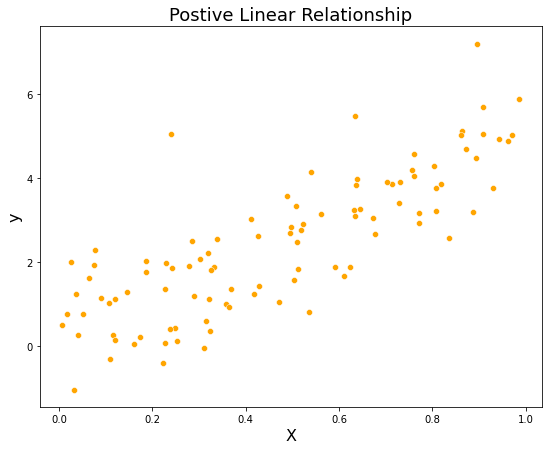

In [111]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=X, y=y, color="orange", ax=ax)
ax.set_ylabel("y", fontsize=16)
ax.set_xlabel("X", fontsize=16)
ax.set_title("Postive Linear Relationship", fontsize=18)

plt.show()

The graph above shows a **Positive** linear relationship between the variables ```X``` and ```y``` as an *increase* in x leads to an *increase* in y.

In [112]:
# Generate random data with negative linear relationship
n = 70  # number of data points
x = np.linspace(0, 10, n)  # independent variable
y = -2 * x + np.random.normal(0, 2, n)  # dependent variable with negative linear relationship and some noise


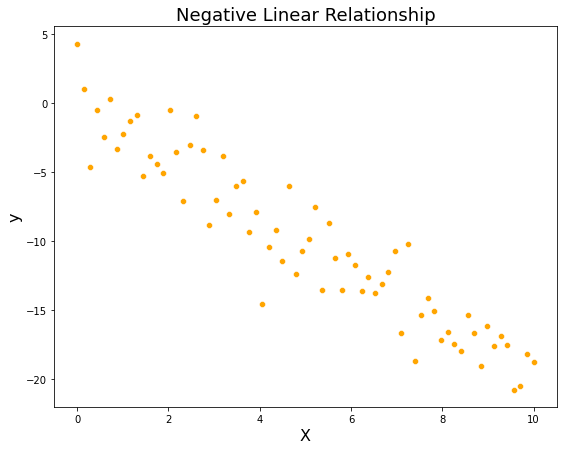

In [113]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=x, y=y, color="orange", ax=ax)
ax.set_ylabel("y", fontsize=16)
ax.set_xlabel("X", fontsize=16)
ax.set_title("Negative Linear Relationship", fontsize=18)

plt.show()

The graph above shows a **Negative** linear relationship between the variables ```X``` and ```y``` as an *increase* in x leads to an *decrease* in y.

## Assumptions After Linear Regression

3. **Normality**: The errors (also known as *residuals*) should be normally distributed. 

📝 Not necessarily the original data. 

*Residuals* are the differences between the observed values and the predicted values. A **normal probability plot**, also called Q-Q plot and statistical tests such as **Shapiro-Wilk** test and the **Kolmogorov-Smirnov** test can be used to assess whether residulas follow a normal distribution. 

If violated we may need to transform the response variable or use non-linear regressin model to account for the non-normal distribution of the residuals.

If met, proceed with linear regression and interpret the results using statistical methods.

In [114]:
# generate some random data for demonstration purpose
np.random.seed(42)
n = 100
x = np.random.normal(0,1,n)
y = 2*x + np.random.normal(0,1,n)

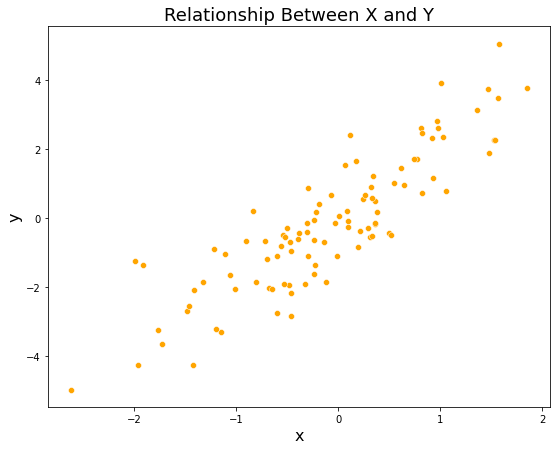

In [115]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=x, y=y, color="orange", ax=ax)
ax.set_ylabel("y", fontsize=16)
ax.set_xlabel("x", fontsize=16)
ax.set_title("Relationship Between X and Y", fontsize=18)

plt.show()

In [116]:
# store in dataframe 
df = pd.DataFrame({"X":x, "Y":y})
len(df)

100

In [117]:
# fit a linear regression model and make predictions
model = np.polyfit(x, y, 1)
df["Predicted"] = np.polyval(model, x)
df.head()

,X,Y,Predicted
0,0.496714,-0.421942,0.929698
1,-0.138264,-0.697174,-0.249293
2,0.647689,0.952663,1.210019
3,1.523030,2.243782,2.835303
4,-0.234153,-0.629592,-0.427335


In [118]:
# calculate the residuals and test for normality
df["residuals"] = df["Y"] - df["Predicted"]
df.head()

,X,Y,Predicted,residuals
0,0.496714,-0.421942,0.929698,-1.351641
1,-0.138264,-0.697174,-0.249293,-0.447881
2,0.647689,0.952663,1.210019,-0.257356
3,1.523030,2.243782,2.835303,-0.591520
4,-0.234153,-0.629592,-0.427335,-0.202258


* Using visualization
 
We can use a histogram or normality plot to test if the residuals are normaly distributed.

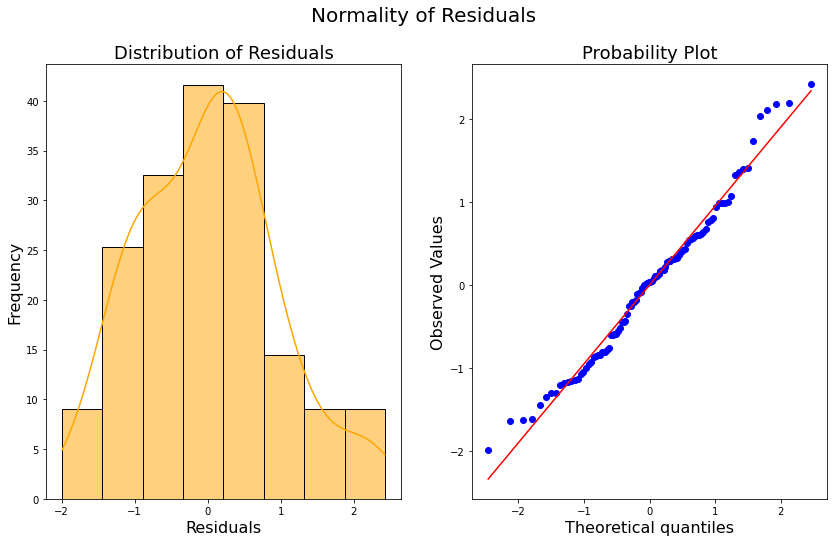

In [119]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# using a histogram
sns.histplot(df["residuals"], stat = 'frequency', color = "orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)

# using a q-q plot 
stats.probplot(df["residuals"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)
ax[1].set_title("Probability Plot", fontsize=18)

fig.suptitle("Normality of Residuals", fontsize=20)

plt.show()

* Using Statistical Test

We can use statistical test such as Shapiro-Wilk Test and the Kolmogorov-Smirnov test to test for normality of residuals.

In [120]:
# using shapiro-wilk test 
stat, p = stats.shapiro(df["residuals"])
print(f"statistic = {np.round(stat,3)}, p-value = {np.round(p,3)}")
alpha = 0.05
if p > alpha:
    print("Fail to reject the null hypothesis and conclude that residuals are normally distributed.")
else:
    print("Reject the null hypothesis and conclude that residuals are not normally distributed.")

statistic = 0.981, p-value = 0.165
Fail to reject the null hypothesis and conclude that residuals are normally distributed.


In [121]:
# using Kolmogorov-Smirnov test 
stat, p = stats.kstest(df["residuals"], 'norm')
print(f"statistic = {np.round(stat,3)}, p-value = {np.round(p,3)}")
alpha = 0.05
if p > alpha:
    print("Fail to reject the null hypothesis and conclude that residuals are normally distributed.")
else:
    print("Reject the null hypothesis and conclude that residuals are not normally distributed.")

statistic = 0.063, p-value = 0.801
Fail to reject the null hypothesis and conclude that residuals are normally distributed.


4. **Independece of Observation**

The residual errors should be independent and not auto-correlated. The predicted residuals should tell nothing about the observed residuals(*the difference between the actual values of the dependent variables and the mean value of the dependent variables*).



* Using Visualization

Examine the residuals by plotting them aganist predicted values(*fitted values*) or the independent variables. 

In [122]:
df.head()

,X,Y,Predicted,residuals
0,0.496714,-0.421942,0.929698,-1.351641
1,-0.138264,-0.697174,-0.249293,-0.447881
2,0.647689,0.952663,1.210019,-0.257356
3,1.523030,2.243782,2.835303,-0.591520
4,-0.234153,-0.629592,-0.427335,-0.202258


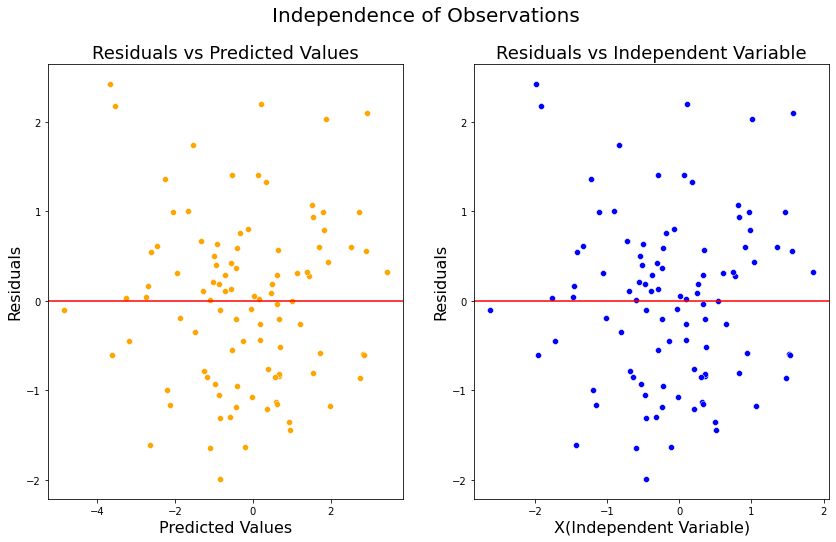

In [123]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# using predicted values
sns.scatterplot(x=df["Predicted"], y=df["residuals"], color = "orange",  ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_ylabel("Residuals", fontsize=16)
ax[0].set_xlabel("Predicted Values", fontsize=16)
ax[0].set_title("Residuals vs Predicted Values", fontsize=18)

# using independent variables 
sns.scatterplot(x=df["X"], y=df["residuals"], color = "blue", ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_ylabel("Residuals", fontsize=16)
ax[1].set_xlabel("X(Independent Variable)", fontsize=16)
ax[1].set_title("Residuals vs Independent Variable", fontsize=18)

fig.suptitle("Independence of Observations", fontsize=20)

plt.show()

* Is there any relationship between the predicted values and the residuals?

* Use Statistical Test

Use a Durbin-Watson Test for independence of errors. The durbin-watson statistic, which ranges from 0 to 4 should be close to 2 and values ```1 <= x => 3``` are a problem. 

In [124]:
# performing durbin-watson test 
durbin_watson_statistic = sm.stats.stattools.durbin_watson(df["residuals"])
print("Durbin-Wason statistic:", durbin_watson_statistic)

Durbin-Wason statistic: 2.1943663205415675


5. **Homoscedasticity** - The variance of the residual errors is the same across all values of the predictor. Indicates the variability of the residuals is consistent and model is reliable for making predictions. Residuals showing a pattern of increasing or decreasing spread with prediced values indicates model not apprpriate for the data.

In [125]:
# preview our data 
df.head()

,X,Y,Predicted,residuals
0,0.496714,-0.421942,0.929698,-1.351641
1,-0.138264,-0.697174,-0.249293,-0.447881
2,0.647689,0.952663,1.210019,-0.257356
3,1.523030,2.243782,2.835303,-0.591520
4,-0.234153,-0.629592,-0.427335,-0.202258


* Using a scatterplot 

Plot a scatter plot of the standardized residual errors aganist the predicted errors.

If the scatterplot shows a random pattern with no clear trend, it suggests that the residuals are homoscedastic.

If there is a clear pattern, such as *funnel shape*, or a *U-shape*, it suggests that the residuals have a non-constant variance.

In [126]:
# calculate the mean and standard deviation of residuals
residuals_mean = np.mean(df["residuals"])
residuals_std = np.std(df["residuals"], ddof=1) # ddof = 1 compute the unbiased sample standard deviation

In [131]:
# calculate the standardized residuals
df["std_resid"] = df["residuals"] / residuals_std
df["std_resid"]

0    -1.430682
1    -0.474072
2    -0.272406
3    -0.626111
4    -0.214085
        ...   
95    0.178068
96   -0.898504
97    0.194437
98    0.054526
99   -1.253242
Name: std_resid, Length: 100, dtype: float64

<details>
    <summary>Why standardized residuals?</summary>

    * Typically use standardized residuals rather than raw residuals because standardized residuals have the same scale for all observations and are therefore more comparable across the range of predicted values.
    * Standardizing the residuals by dividing them by their estimated standard deviation can help to remove the effect of changing variance and make it easier to detect patterns or trends in the scatterplot that suggest heteroscedasticity.
</details>    

In [132]:
# preview the data 
df.head()

,X,Y,Predicted,residuals,std_resid
0,0.496714,-0.421942,0.929698,-1.351641,-1.430682
1,-0.138264,-0.697174,-0.249293,-0.447881,-0.474072
2,0.647689,0.952663,1.210019,-0.257356,-0.272406
3,1.523030,2.243782,2.835303,-0.591520,-0.626111
4,-0.234153,-0.629592,-0.427335,-0.202258,-0.214085


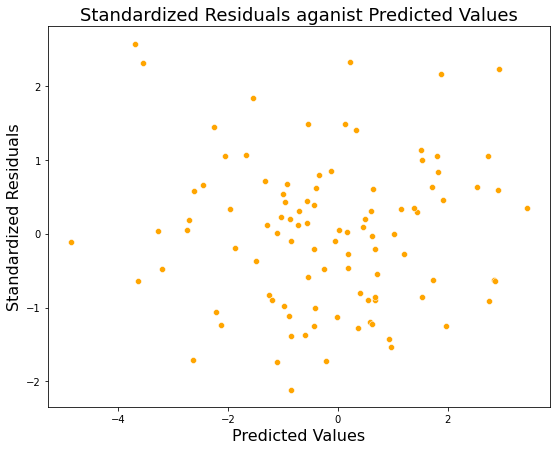

In [133]:
# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=df["Predicted"], y=df["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals aganist Predicted Values", fontsize=18)

plt.show()

## Visualization of Errors

One way to visualize errors in a linear regression model is by plotting a scatterplot of the predicted values versus the actual values, with errors represented by the vertical distance between each point and the regression line(**Residual Plot**).

### Centering / Mean-Centering

* Adjusting the X so that the intercept term of the best-fit line will be 0
* Involves subtracting the mean of the predictor variable from each observation of that variable.
<details>
    <summary> What's the purpose? </summary>
    
        * To shift the data so that the intercept of the regression line represents the predicted value of the dependent variable when all the predictor variables are equal to their means.
        
        * Example where useful;- Interpreting the intercept as a meaningful value or when comparing the intercepts of different models.
</details>

* Centering the data can be useful in situations where the intercept term is not meaningful or relevant. Example, in some scientific studies, the relationship between two variables may be of interest only when one variable is at a specific value, ie, the intercept term is not meaningful. By centering the data, we can remove the intercept term from the regression equation and focus solely on the relationship between variables.

* Centering also helps to improve the interpretability of regression coefficients. When X is not centered, the interpretation of the regression coefficients can be difficult because they are affected by the scaling of X variable. By centering X, the interpretation of the regression coefficients becomes more straightfoward because they represent the change in the dependent variable for a one-unit change in the independent variable when the independent variable is at its mean.

Suppose you are analyzing the relationship between the numbers of hours spent studying and the grade received on an exam. You collect data from a group of students, and after fitting a linear regression model, you find that the intercept term is not statistically significant, indicating that there is no relationship between the grade and the number of hours studied. However, it is possible that the intercept term is not statistically significant simply because the data is not centered around zero. In this case, you could adjust the X variable(number of hours studied) by subtracting the mean value of X from each observation, so that the intercept term of the best-fit line will be 0. By doing so, you may find the relationship between the number of hours studied and the grade received becomes statistically significant. 

In [134]:
# generate simulated data 
hours_studied = np.random.normal(loc=10, scale=2, size=100)
grades_received = 60 + 5 * hours_studied + np.random.normal(scale=10, size=100)

In [135]:
# preview the data 
hours_studied

array([10.71557472, 11.12156905, 12.16610249, 12.1076041 ,  7.24466126,
        8.12434992, 11.03007053, 11.0275719 , 11.03009537, 17.70546298,
       11.14178102, 12.27113128, 11.90800353, 11.3027825 ,  9.36946151,
       11.51793844,  8.45434957,  9.52636279,  9.0292729 , 10.16374828,
       14.62931713,  6.26546961, 11.37252038,  6.77456826,  9.05613627,
       12.17790119, 10.12856004,  7.84451044,  8.56939258, 11.3591955 ,
        8.53926674, 10.43291718, 10.09114368,  8.6967993 , 14.28788818,
       11.26783804,  5.94971483, 10.37290863,  8.67642707, 11.70486667,
        8.41495852,  9.77052712, 11.00997456, 11.73151039,  7.59940719,
        9.33099753,  9.05010938,  8.69334153, 13.53090848, 10.80996342,
        7.47823209, 11.83572389, 14.24431239, 12.06493052,  6.96126007,
        9.03153185, 12.5338223 ,  8.58466107, 10.88763886, 11.54926811,
        8.14613906,  9.88094929,  3.51746532,  7.95122472,  9.4948637 ,
        7.50443364, 13.26482261,  7.13971724,  9.11991103, 10.26

In [136]:
grades_received

array([105.28792349, 110.00603486, 128.30344848, 126.64172317,
        96.01429038, 101.79502343, 127.92700163, 109.22214562,
       120.62145067, 146.50538838, 113.53209307, 132.34342492,
       127.79418112, 124.64900887, 119.90209563, 117.79973062,
       109.09127757, 104.52914637, 108.38802805, 109.51731085,
       134.11654532,  97.27891833, 108.68039507, 114.79671404,
        95.22050753, 108.74761984, 122.22390893, 107.13917916,
       109.08816108, 123.07943258, 102.57386595, 103.19204218,
       111.21376398,  96.71237941, 141.19063823, 114.86861641,
        81.49360217, 108.65068473, 107.5114499 , 112.88708782,
        93.85258866, 111.2895077 , 117.4995385 , 113.58812019,
        93.28665287, 108.97548702,  90.76970347,  89.39206993,
       120.47010019, 111.91534559, 100.50023611, 133.93218164,
       139.7981582 , 118.72526731,  94.61613826,  95.13236562,
       122.48398013, 100.03671895, 117.66537988, 109.4740311 ,
       105.92416043, 124.73213557,  76.49972511, 103.77

In [ ]:
from scipy.stats import linregress

# fit a linear regression model 
slope, intercept, r_value, p_value, stderr = linregress(hours_studied, grades_received)

print(f"slope: {np.round(slope,3)}")
print(f"intercept: {np.round(intercept,3)}")
print(f"R-value: {np.round(r_value,3)}")
print(f"P-value: {p_value}")
print(f"Standard Error: {np.round(stderr,3)}")

slope: 4.999
intercept: 61.079
R-value: 0.775
P-value: 3.050982370316499e-21
Standard Error: 0.412


The intercept term is statistically significant, indicating that there is a relationship between the number of hours studied and grade received.

Adjust the ```hours_studied``` variable by subtracting the mean value of ```hours_studied``` from each observation;

In [ ]:
# adjust hours studied variable
hours_studied_adj = hours_studied - np.mean(hours_studied)

hours_studied_adj

array([ 5.85782214e-01,  9.91776547e-01,  2.03630998e+00,  1.97781160e+00,
       -2.88513124e+00, -2.00544259e+00,  9.00278028e-01,  8.97779396e-01,
        9.00302866e-01,  7.57567048e+00,  1.01198852e+00,  2.14133877e+00,
        1.77821102e+00,  1.17299000e+00, -7.60330995e-01,  1.38814593e+00,
       -1.67544294e+00, -6.03429720e-01, -1.10051960e+00,  3.39557726e-02,
        4.49952463e+00, -3.86432289e+00,  1.24272787e+00, -3.35522425e+00,
       -1.07365624e+00,  2.04810869e+00, -1.23246801e-03, -2.28528206e+00,
       -1.56039992e+00,  1.22940299e+00, -1.59052577e+00,  3.03124673e-01,
       -3.86488264e-02, -1.43299320e+00,  4.15809567e+00,  1.13804554e+00,
       -4.18007768e+00,  2.43116123e-01, -1.45336544e+00,  1.57507416e+00,
       -1.71483398e+00, -3.59265389e-01,  8.80182052e-01,  1.60171788e+00,
       -2.53038532e+00, -7.98794978e-01, -1.07968313e+00, -1.43645097e+00,
        3.40111597e+00,  6.80170916e-01, -2.65156041e+00,  1.70593139e+00,
        4.11451989e+00,  

In [ ]:
# fit a linear regression model with adjusted hours studied variable
slope, intercept_adj, r_value, p_value, stderr = linregress(hours_studied_adj, grades_received)

print(f"slope: {np.round(slope,3)}")
print(f"intercept: {np.round(intercept_adj,3)}")
print(f"R-value: {np.round(r_value,3)}")
print(f"P-value: {p_value}")
print(f"Standard Error: {np.round(stderr,3)}")

slope: 4.999
intercept: 111.717
R-value: 0.775
P-value: 3.0509823703164343e-21
Standard Error: 0.412


By subtracting the mean of the hours studied variable from each observation, the data is centered around 0. The intercept of the best-fit line now represents the predicted value of the response variable(grade received) when the predictor variable(hours studied) is equal to 0, which may or not be meaningful depending on the context of the problem.

```The adjusted intercept of 111.717 means that the predicted grade received when a student does not study at all is 111.717, which is likely not meaningful in the context of this problem.```

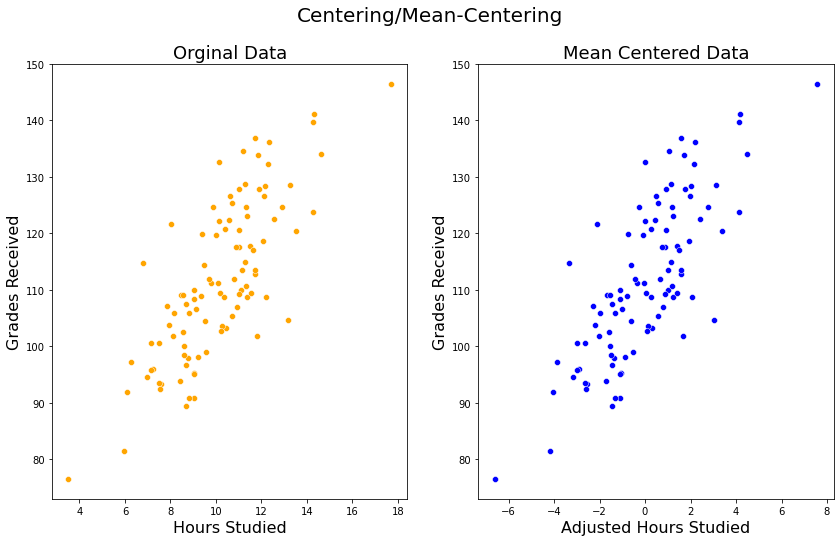

In [ ]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# scatter plot with hours studied
sns.scatterplot(x=hours_studied, y=grades_received, color = "orange",  ax=ax[0])
ax[0].set_ylabel("Grades Received", fontsize=16)
ax[0].set_xlabel("Hours Studied", fontsize=16)
ax[0].set_title("Orginal Data", fontsize=18)

# Scatter plot with adjusted hours studied
sns.scatterplot(x=hours_studied_adj, y=grades_received, color = "blue", ax=ax[1])
ax[1].set_ylabel("Grades Received", fontsize=16)
ax[1].set_xlabel("Adjusted Hours Studied", fontsize=16)
ax[1].set_title("Mean Centered Data", fontsize=18)

fig.suptitle("Centering/Mean-Centering", fontsize=20)

plt.show()